In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()

#Assignment 11. Elliptic PDEs

#Abstract

This assignment examines applying finite-difference method and Gauss-Seidel method to solve Poisson equation PDE. The results are calculated for multiple resolutions, visualized and compared. Higher resolution gives more datapoints and therefore more accurately represents the system.  

#Introduction

We have the following Poisson equation:
$$\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}+\frac{\partial^2 T}{\partial z^2}=-10$$

Boundary condition is T=0 at the boundaries. We solve this for several resolutions: $\Delta x = 1/3,1/4,1/5,1/6,1/8,1/10$

The results are visualized using heatmap from Seaborn library. For each value of $z$ an $x-y$ plane with temperature values is visualized.  


#Methodology

Applying finite-difference formula, we rewrite the equation to be:
$$T_{i,j,k}=\frac{1}{6}\left(10(\Delta x)^2+T_{i+1,j,k}+T_{i-1,j,k}+T_{i,j+1,k}+T_{i,j-1,k}+T_{i,j,k+1}+T_{i,j,k-1}\right)$$

We iterate through it using Gauss-Seidel method(initially $T=0$) and use the stopping condition: $$\frac{T_{i,j,k}^{new}-T^{old}_{i,j,k}}{T_{i,j,k}^{new}}<e$$ for all $i,j,k$

In [2]:
def gs(res,e):
  n=int(1/res)
  T=np.zeros((n+1,n+1,n+1))
  q=0
  while(q<(n-1)**3):
    q=0
    for i in range(1,n):
      for j in range(1,n):
        for k in range(1,n):
          T_old=T[i,j,k]
          T[i,j,k]=1/6*(10*res**2+T[i+1,j,k]+T[i-1,j,k]+T[i,j+1,k]+T[i,j-1,k]+T[i,j,k+1]+T[i,j,k-1])
          T_new=T[i,j,k]
          if(abs((T_new-T_old)/T_new)<e):
            q=q+1
  return T

#Results
Resolution=$\frac{1}{6}$

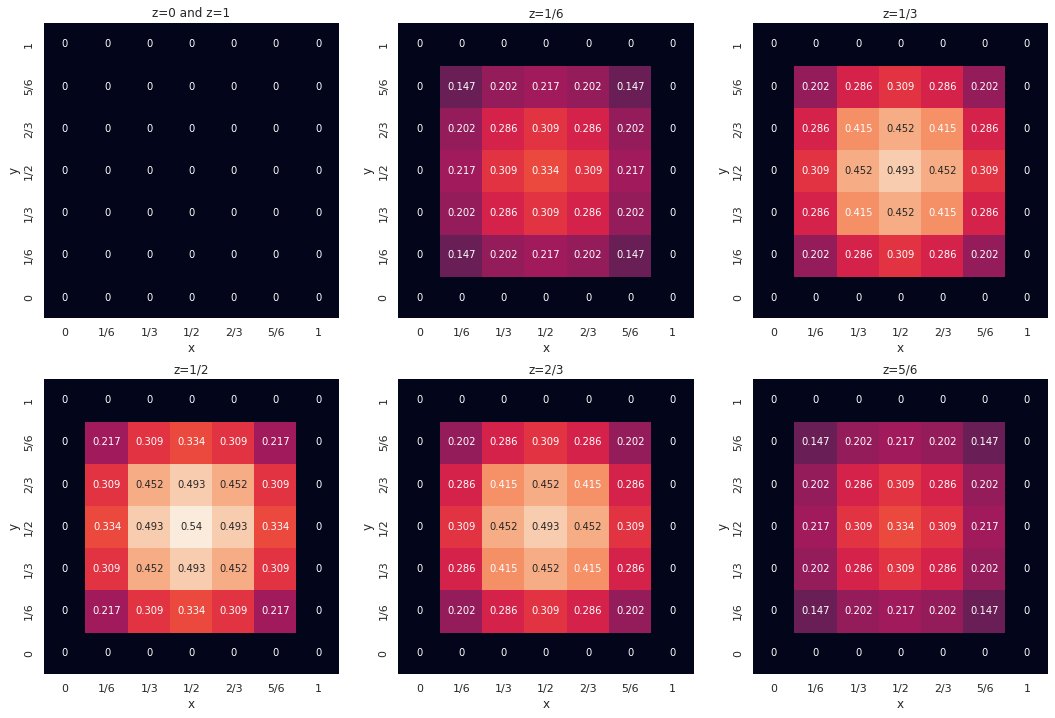

In [3]:
T=gs(1/6,0.0001)
T0=pd.DataFrame(T[:,:,0])
T1=pd.DataFrame(T[:,:,1])
T2=pd.DataFrame(T[:,:,2])
T3=pd.DataFrame(T[:,:,3])
T4=pd.DataFrame(T[:,:,4])
T5=pd.DataFrame(T[:,:,5])

fig, axs = plt.subplots(2,3)
fig.set_size_inches(18,12,forward=True)
sns.heatmap(T0, annot=True, fmt='.3g', ax=axs[0,0],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T1, annot=True, fmt='.3g', ax=axs[0,1],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T2, annot=True, fmt='.3g', ax=axs[0,2],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T3, annot=True, fmt='.3g', ax=axs[1,0],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T4, annot=True, fmt='.3g', ax=axs[1,1],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T5, annot=True, fmt='.3g', ax=axs[1,2],square=True,vmax=T.max(),cbar=False)
axs[0,0].set(xlabel='x',ylabel='y',title='z=0 and z=1'); axs[0,0].invert_yaxis()
axs[0,1].set(xlabel='x',ylabel='y',title='z=1/6'); axs[0,1].invert_yaxis()
axs[0,2].set(xlabel='x',ylabel='y',title='z=1/3'); axs[0,2].invert_yaxis()
axs[1,0].set(xlabel='x',ylabel='y',title='z=1/2'); axs[1,0].invert_yaxis()
axs[1,1].set(xlabel='x',ylabel='y',title='z=2/3'); axs[1,1].invert_yaxis()
axs[1,2].set(xlabel='x',ylabel='y',title='z=5/6'); axs[1,2].invert_yaxis()
ticks=["0","1/6","1/3","1/2","2/3","5/6","1"]
axs[0,0].set_xticklabels(ticks);axs[0,0].set_yticklabels(ticks)
axs[0,1].set_xticklabels(ticks);axs[0,1].set_yticklabels(ticks)
axs[0,2].set_xticklabels(ticks);axs[0,2].set_yticklabels(ticks)
axs[1,0].set_xticklabels(ticks);axs[1,0].set_yticklabels(ticks)
axs[1,1].set_xticklabels(ticks);axs[1,1].set_yticklabels(ticks)
axs[1,2].set_xticklabels(ticks);axs[1,2].set_yticklabels(ticks)
plt.show()

Resolution=$\frac{1}{5}$

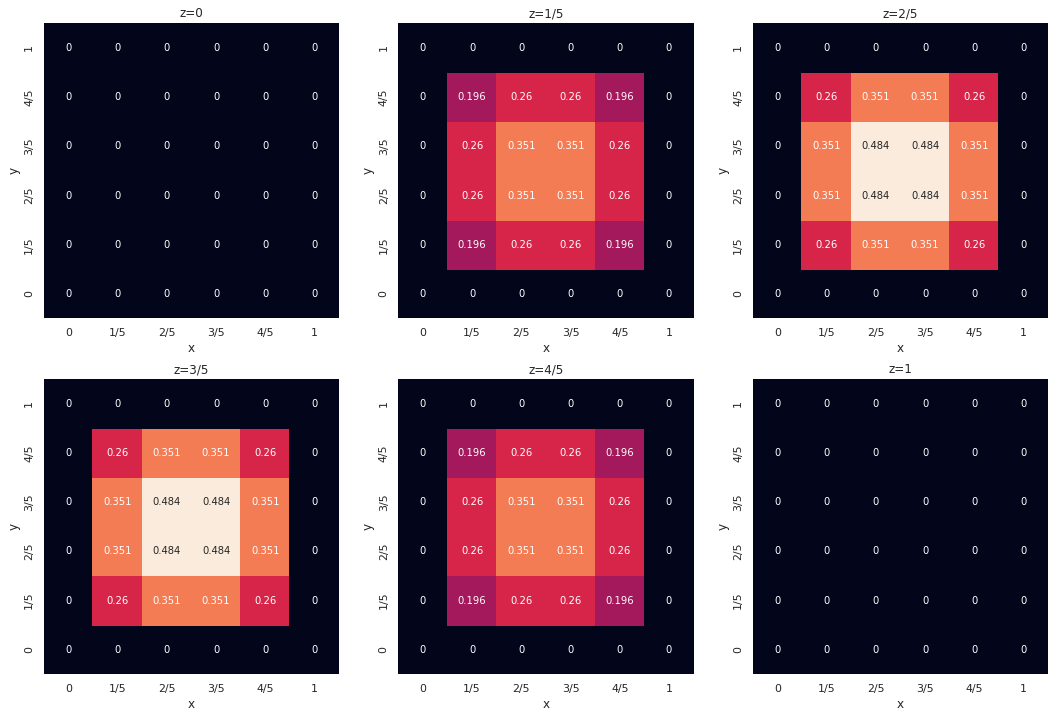

In [4]:
T=gs(1/5,0.0001)
T0=pd.DataFrame(T[:,:,0])
T1=pd.DataFrame(T[:,:,1])
T2=pd.DataFrame(T[:,:,2])
T3=pd.DataFrame(T[:,:,3])
T4=pd.DataFrame(T[:,:,4])
T5=pd.DataFrame(T[:,:,5])
T6=pd.DataFrame(T[:,:,5])
ticks=np.linspace(0,1,6)

fig, axs = plt.subplots(2,3)
fig.set_size_inches(18,12,forward=True)
sns.heatmap(T0, annot=True, fmt='.3g', ax=axs[0,0],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T1, annot=True, fmt='.3g', ax=axs[0,1],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T2, annot=True, fmt='.3g', ax=axs[0,2],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T3, annot=True, fmt='.3g', ax=axs[1,0],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T4, annot=True, fmt='.3g', ax=axs[1,1],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T5, annot=True, fmt='.3g', ax=axs[1,2],square=True,vmax=T.max(),cbar=False)
axs[0,0].set(xlabel='x',ylabel='y',title='z=0'); axs[0,0].invert_yaxis()
axs[0,1].set(xlabel='x',ylabel='y',title='z=1/5'); axs[0,1].invert_yaxis()
axs[0,2].set(xlabel='x',ylabel='y',title='z=2/5'); axs[0,2].invert_yaxis()
axs[1,0].set(xlabel='x',ylabel='y',title='z=3/5'); axs[1,0].invert_yaxis()
axs[1,1].set(xlabel='x',ylabel='y',title='z=4/5'); axs[1,1].invert_yaxis()
axs[1,2].set(xlabel='x',ylabel='y',title='z=1'); axs[1,2].invert_yaxis()
ticks=["0","1/5","2/5","3/5","4/5","1"]
axs[0,0].set_xticklabels(ticks);axs[0,0].set_yticklabels(ticks)
axs[0,1].set_xticklabels(ticks);axs[0,1].set_yticklabels(ticks)
axs[0,2].set_xticklabels(ticks);axs[0,2].set_yticklabels(ticks)
axs[1,0].set_xticklabels(ticks);axs[1,0].set_yticklabels(ticks)
axs[1,1].set_xticklabels(ticks);axs[1,1].set_yticklabels(ticks)
axs[1,2].set_xticklabels(ticks);axs[1,2].set_yticklabels(ticks)
plt.show()

Resolution=$\frac{1}{4}$

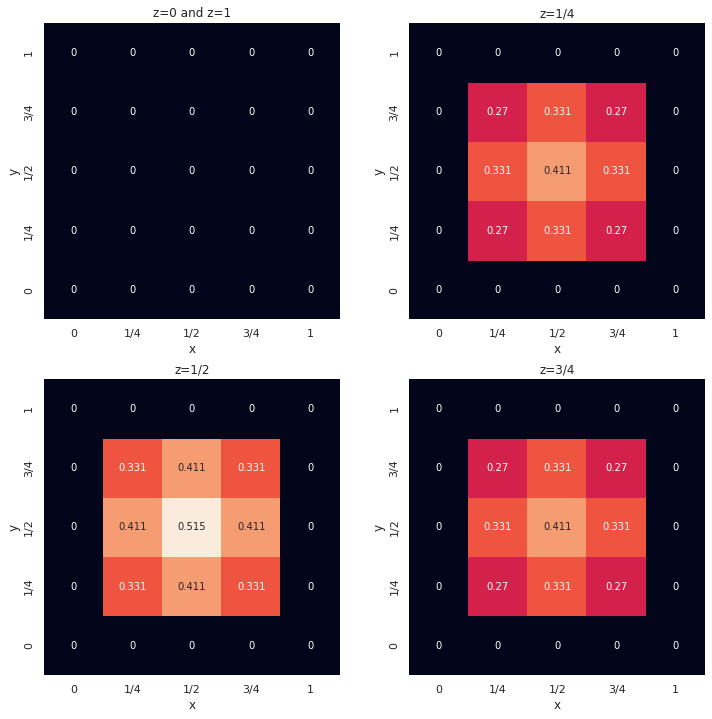

In [5]:
T=gs(1/4,0.0001)
T0=pd.DataFrame(T[:,:,0])
T1=pd.DataFrame(T[:,:,1])
T2=pd.DataFrame(T[:,:,2])
T3=pd.DataFrame(T[:,:,3])

fig, axs = plt.subplots(2,2)
fig.set_size_inches(12,12,forward=True)
sns.heatmap(T0, annot=True, fmt='.3g', ax=axs[0,0],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T1, annot=True, fmt='.3g', ax=axs[0,1],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T2, annot=True, fmt='.3g', ax=axs[1,0],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T3, annot=True, fmt='.3g', ax=axs[1,1],square=True,vmax=T.max(),cbar=False)
axs[0,0].set(xlabel='x',ylabel='y',title='z=0 and z=1'); axs[0,0].invert_yaxis()
axs[0,1].set(xlabel='x',ylabel='y',title='z=1/4'); axs[0,1].invert_yaxis()
axs[1,0].set(xlabel='x',ylabel='y',title='z=1/2'); axs[1,0].invert_yaxis()
axs[1,1].set(xlabel='x',ylabel='y',title='z=3/4'); axs[1,1].invert_yaxis()
ticks=["0","1/4","1/2","3/4","1"]
axs[0,0].set_xticklabels(ticks);axs[0,0].set_yticklabels(ticks)
axs[0,1].set_xticklabels(ticks);axs[0,1].set_yticklabels(ticks)
axs[1,0].set_xticklabels(ticks);axs[1,0].set_yticklabels(ticks)
axs[1,1].set_xticklabels(ticks);axs[1,1].set_yticklabels(ticks)
plt.show()

Resolution=$\frac{1}{3}$

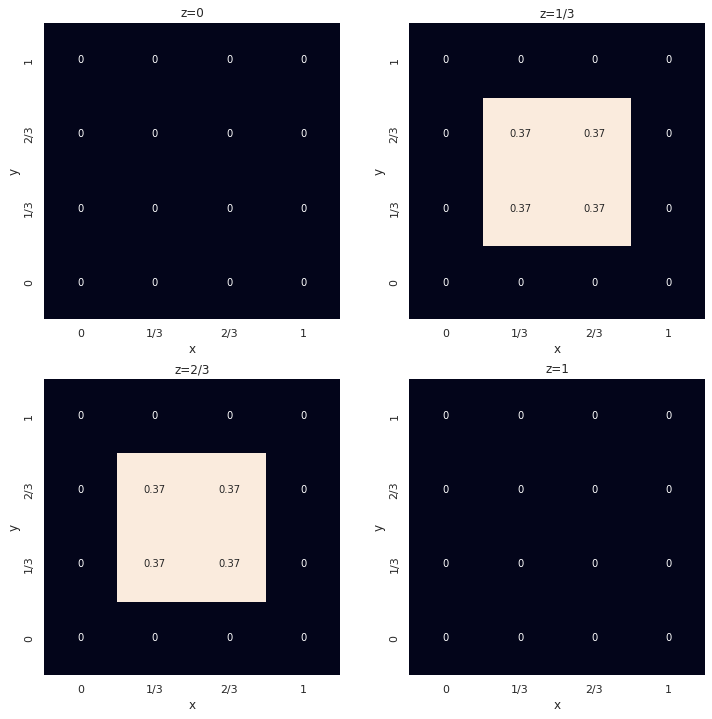

In [6]:
T=gs(1/3,0.0001)
T0=pd.DataFrame(T[:,:,0])
T1=pd.DataFrame(T[:,:,1])
T2=pd.DataFrame(T[:,:,2])
T3=pd.DataFrame(T[:,:,3])

fig, axs = plt.subplots(2,2)
fig.set_size_inches(12,12,forward=True)
sns.heatmap(T0, annot=True, fmt='.3g', ax=axs[0,0],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T1, annot=True, fmt='.3g', ax=axs[0,1],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T2, annot=True, fmt='.3g', ax=axs[1,0],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T3, annot=True, fmt='.3g', ax=axs[1,1],square=True,vmax=T.max(),cbar=False)
axs[0,0].set(xlabel='x',ylabel='y',title='z=0'); axs[0,0].invert_yaxis()
axs[0,1].set(xlabel='x',ylabel='y',title='z=1/3'); axs[0,1].invert_yaxis()
axs[1,0].set(xlabel='x',ylabel='y',title='z=2/3'); axs[1,0].invert_yaxis()
axs[1,1].set(xlabel='x',ylabel='y',title='z=1'); axs[1,1].invert_yaxis()
ticks=["0","1/3","2/3","1"]
axs[0,0].set_xticklabels(ticks);axs[0,0].set_yticklabels(ticks)
axs[0,1].set_xticklabels(ticks);axs[0,1].set_yticklabels(ticks)
axs[1,0].set_xticklabels(ticks);axs[1,0].set_yticklabels(ticks)
axs[1,1].set_xticklabels(ticks);axs[1,1].set_yticklabels(ticks)
plt.show()

Resolution=$\frac{1}{8}$

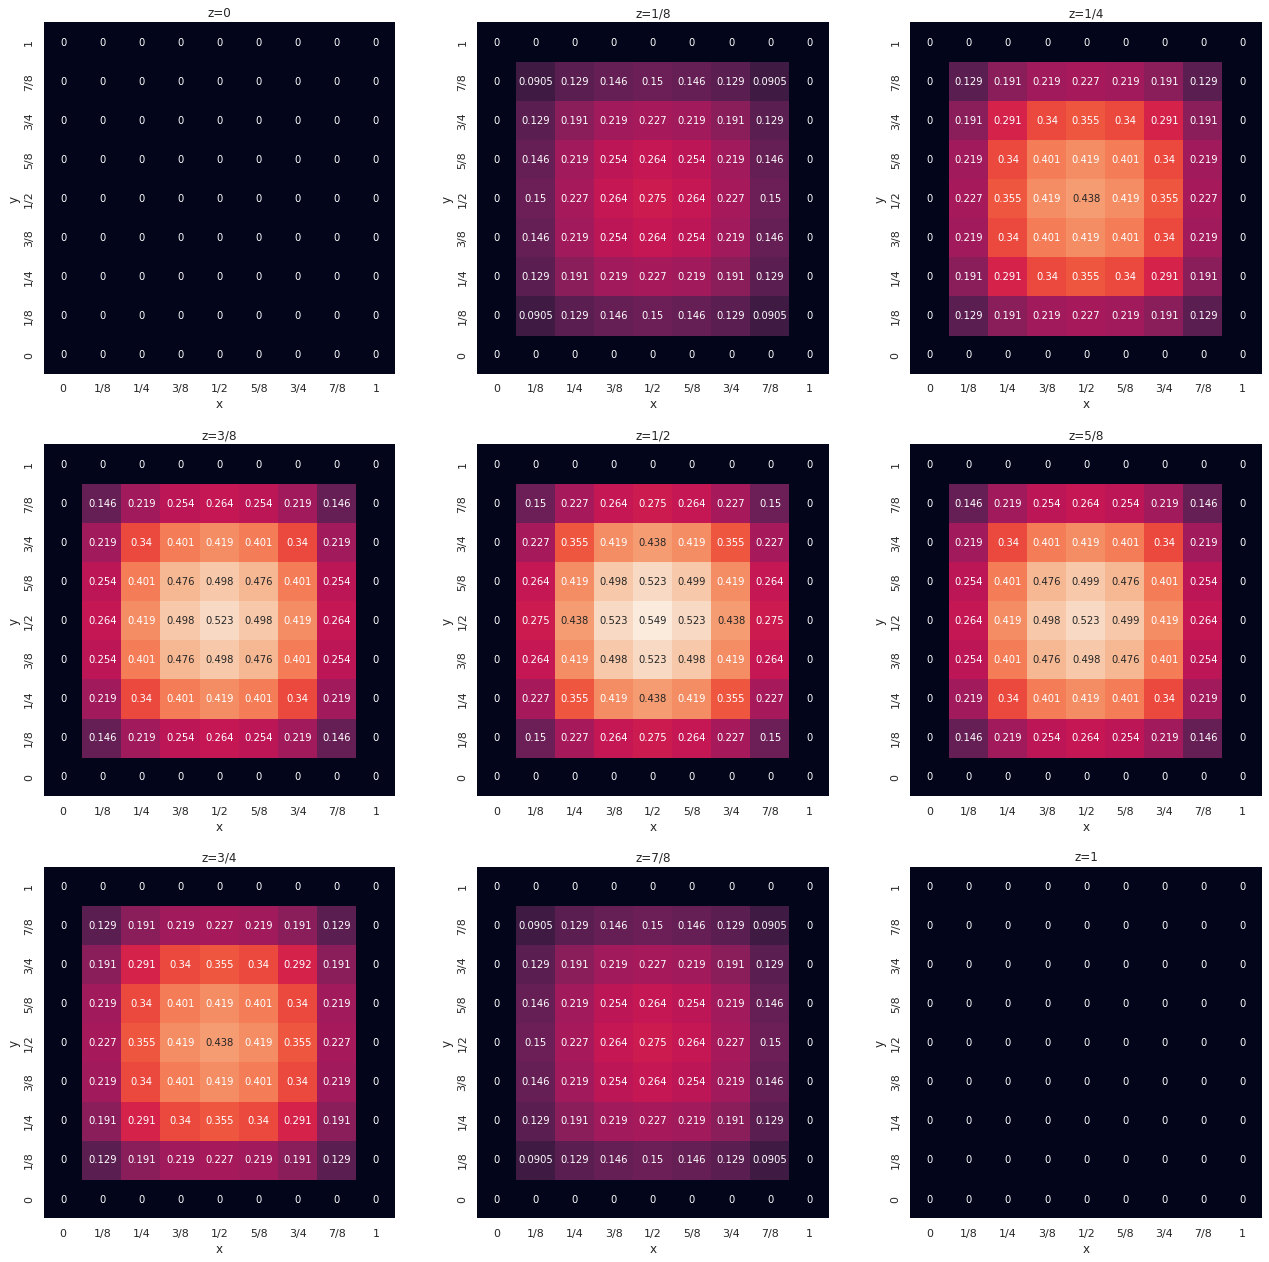

In [8]:
T=gs(1/8,0.0001)
T0=pd.DataFrame(T[:,:,0])
T1=pd.DataFrame(T[:,:,1])
T2=pd.DataFrame(T[:,:,2])
T3=pd.DataFrame(T[:,:,3])
T4=pd.DataFrame(T[:,:,4])
T5=pd.DataFrame(T[:,:,5])
T6=pd.DataFrame(T[:,:,6])
T7=pd.DataFrame(T[:,:,7])
T8=pd.DataFrame(T[:,:,8])


fig, axs = plt.subplots(3,3)
fig.set_size_inches(22,22,forward=True)
sns.heatmap(T0, annot=True, fmt='.3g', ax=axs[0,0],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T1, annot=True, fmt='.3g', ax=axs[0,1],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T2, annot=True, fmt='.3g', ax=axs[0,2],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T3, annot=True, fmt='.3g', ax=axs[1,0],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T4, annot=True, fmt='.3g', ax=axs[1,1],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T5, annot=True, fmt='.3g', ax=axs[1,2],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T6, annot=True, fmt='.3g', ax=axs[2,0],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T7, annot=True, fmt='.3g', ax=axs[2,1],square=True,vmax=T.max(),cbar=False)
sns.heatmap(T8, annot=True, fmt='.3g', ax=axs[2,2],square=True,vmax=T.max(),cbar=False)


axs[0,0].set(xlabel='x',ylabel='y',title='z=0'); axs[0,0].invert_yaxis()
axs[0,1].set(xlabel='x',ylabel='y',title='z=1/8'); axs[0,1].invert_yaxis()
axs[0,2].set(xlabel='x',ylabel='y',title='z=1/4'); axs[0,2].invert_yaxis()
axs[1,0].set(xlabel='x',ylabel='y',title='z=3/8'); axs[1,0].invert_yaxis()
axs[1,1].set(xlabel='x',ylabel='y',title='z=1/2'); axs[1,1].invert_yaxis()
axs[1,2].set(xlabel='x',ylabel='y',title='z=5/8'); axs[1,2].invert_yaxis()
axs[2,0].set(xlabel='x',ylabel='y',title='z=3/4'); axs[2,0].invert_yaxis()
axs[2,1].set(xlabel='x',ylabel='y',title='z=7/8'); axs[2,1].invert_yaxis()
axs[2,2].set(xlabel='x',ylabel='y',title='z=1'); axs[2,2].invert_yaxis()

ticks=["0","1/8","1/4","3/8","1/2","5/8","3/4","7/8","1"]
axs[0,0].set_xticklabels(ticks);axs[0,0].set_yticklabels(ticks)
axs[0,1].set_xticklabels(ticks);axs[0,1].set_yticklabels(ticks)
axs[0,2].set_xticklabels(ticks);axs[0,2].set_yticklabels(ticks)
axs[1,0].set_xticklabels(ticks);axs[1,0].set_yticklabels(ticks)
axs[1,1].set_xticklabels(ticks);axs[1,1].set_yticklabels(ticks)
axs[1,2].set_xticklabels(ticks);axs[1,2].set_yticklabels(ticks)
axs[2,0].set_xticklabels(ticks);axs[2,0].set_yticklabels(ticks)
axs[2,1].set_xticklabels(ticks);axs[2,1].set_yticklabels(ticks)
axs[2,2].set_xticklabels(ticks);axs[2,2].set_yticklabels(ticks)

plt.show()

Resolution=$\frac{1}{10}$

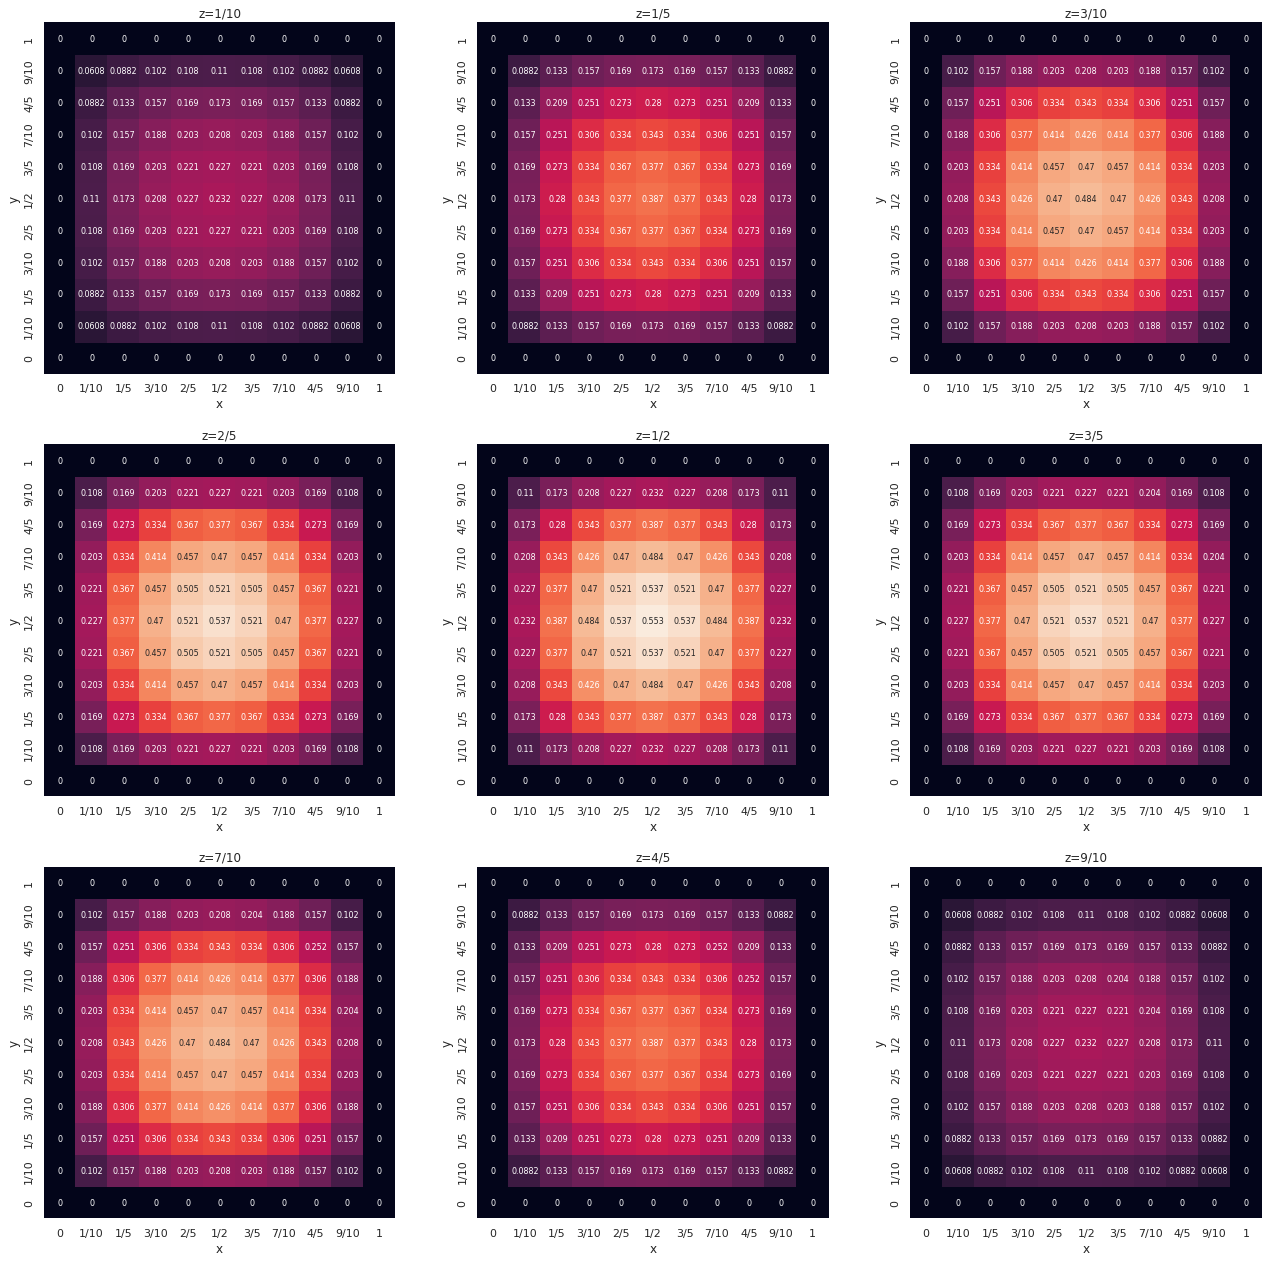

In [7]:
T=gs(1/10,0.0001)
T1=pd.DataFrame(T[:,:,1])
T2=pd.DataFrame(T[:,:,2])
T3=pd.DataFrame(T[:,:,3])
T4=pd.DataFrame(T[:,:,4])
T5=pd.DataFrame(T[:,:,5])
T6=pd.DataFrame(T[:,:,6])
T7=pd.DataFrame(T[:,:,7])
T8=pd.DataFrame(T[:,:,8])
T9=pd.DataFrame(T[:,:,9])




fig, axs = plt.subplots(3,3)
fig.set_size_inches(22,22,forward=True)
sns.heatmap(T1, annot=True, fmt='.3g', ax=axs[0,0],square=True,vmax=T.max(),cbar=False,annot_kws={"size":8})
sns.heatmap(T2, annot=True, fmt='.3g', ax=axs[0,1],square=True,vmax=T.max(),cbar=False,annot_kws={"size":8})
sns.heatmap(T3, annot=True, fmt='.3g', ax=axs[0,2],square=True,vmax=T.max(),cbar=False,annot_kws={"size":8})
sns.heatmap(T4, annot=True, fmt='.3g', ax=axs[1,0],square=True,vmax=T.max(),cbar=False,annot_kws={"size":8})
sns.heatmap(T5, annot=True, fmt='.3g', ax=axs[1,1],square=True,vmax=T.max(),cbar=False,annot_kws={"size":8})
sns.heatmap(T6, annot=True, fmt='.3g', ax=axs[1,2],square=True,vmax=T.max(),cbar=False,annot_kws={"size":8})
sns.heatmap(T7, annot=True, fmt='.3g', ax=axs[2,0],square=True,vmax=T.max(),cbar=False,annot_kws={"size":8})
sns.heatmap(T8, annot=True, fmt='.3g', ax=axs[2,1],square=True,vmax=T.max(),cbar=False,annot_kws={"size":8})
sns.heatmap(T9, annot=True, fmt='.3g', ax=axs[2,2],square=True,vmax=T.max(),cbar=False,annot_kws={"size":8})



axs[0,0].set(xlabel='x',ylabel='y',title='z=1/10'); axs[0,0].invert_yaxis()
axs[0,1].set(xlabel='x',ylabel='y',title='z=1/5'); axs[0,1].invert_yaxis()
axs[0,2].set(xlabel='x',ylabel='y',title='z=3/10'); axs[0,2].invert_yaxis()
axs[1,0].set(xlabel='x',ylabel='y',title='z=2/5'); axs[1,0].invert_yaxis()
axs[1,1].set(xlabel='x',ylabel='y',title='z=1/2'); axs[1,1].invert_yaxis()
axs[1,2].set(xlabel='x',ylabel='y',title='z=3/5'); axs[1,2].invert_yaxis()
axs[2,0].set(xlabel='x',ylabel='y',title='z=7/10'); axs[2,0].invert_yaxis()
axs[2,1].set(xlabel='x',ylabel='y',title='z=4/5'); axs[2,1].invert_yaxis()
axs[2,2].set(xlabel='x',ylabel='y',title='z=9/10'); axs[2,2].invert_yaxis()

ticks=["0","1/10","1/5","3/10","2/5","1/2","3/5","7/10","4/5","9/10","1"]
axs[0,0].set_xticklabels(ticks);axs[0,0].set_yticklabels(ticks)
axs[0,1].set_xticklabels(ticks);axs[0,1].set_yticklabels(ticks)
axs[0,2].set_xticklabels(ticks);axs[0,2].set_yticklabels(ticks)
axs[1,0].set_xticklabels(ticks);axs[1,0].set_yticklabels(ticks)
axs[1,1].set_xticklabels(ticks);axs[1,1].set_yticklabels(ticks)
axs[1,2].set_xticklabels(ticks);axs[1,2].set_yticklabels(ticks)
axs[2,0].set_xticklabels(ticks);axs[2,0].set_yticklabels(ticks)
axs[2,1].set_xticklabels(ticks);axs[2,1].set_yticklabels(ticks)
axs[2,2].set_xticklabels(ticks);axs[2,2].set_yticklabels(ticks)

plt.show()

#Conclusion
We can see that higher resolution gives more points and so it represents the original system more accurately. Also the because boundary conditions are symmetric, the solution is also spherically symmetric 

#References
*Lecture by Prof. Abdikamalov:
https://www.youtube.com/watch?v=6R1BL_VYsQc

*Chapra, S. C., & Canale, R. P. (2011). Numerical methods for engineers